<a href="https://colab.research.google.com/github/arwa-mili/Coolab/blob/main/Speech_emotion_recognition_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('drive/MyDrive/emotionreco/TESS Toronto emotional speech set data/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
paths[:5]

['drive/MyDrive/emotionreco/TESS Toronto emotional speech set data/YAF_tire_fear.wav',
 'drive/MyDrive/emotionreco/TESS Toronto emotional speech set data/YAF_rag_fear.wav',
 'drive/MyDrive/emotionreco/TESS Toronto emotional speech set data/YAF_ton_fear.wav',
 'drive/MyDrive/emotionreco/TESS Toronto emotional speech set data/YAF_door_fear.wav',
 'drive/MyDrive/emotionreco/TESS Toronto emotional speech set data/YAF_such_fear.wav']

In [ ]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,drive/MyDrive/emotionreco/TESS Toronto emotion...,fear
1,drive/MyDrive/emotionreco/TESS Toronto emotion...,fear
2,drive/MyDrive/emotionreco/TESS Toronto emotion...,fear
3,drive/MyDrive/emotionreco/TESS Toronto emotion...,fear
4,drive/MyDrive/emotionreco/TESS Toronto emotion...,fear


###ExDA

In [ ]:
df['label'].value_counts()

fear       400
disgust    400
happy      400
neutral    400
ps         400
sad        400
angry      400
Name: label, dtype: int64

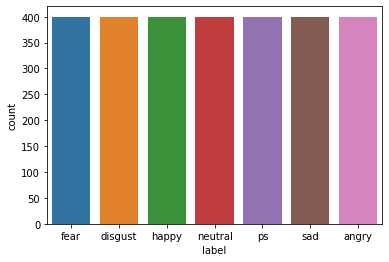

In [ ]:
sns.countplot(df['label'])

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

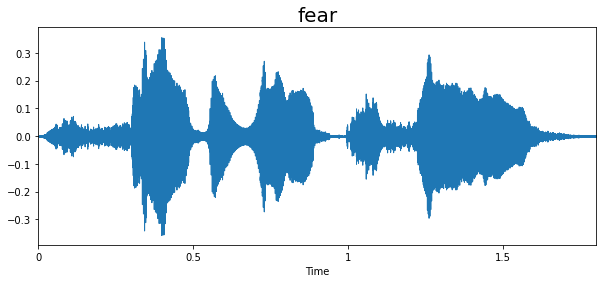

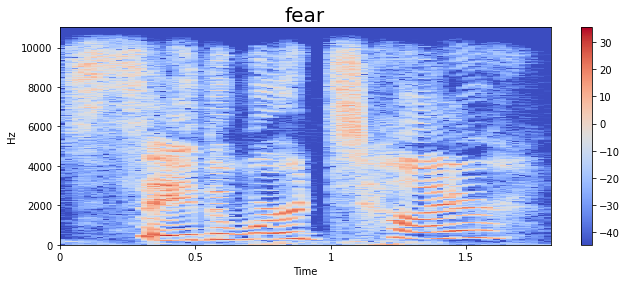

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

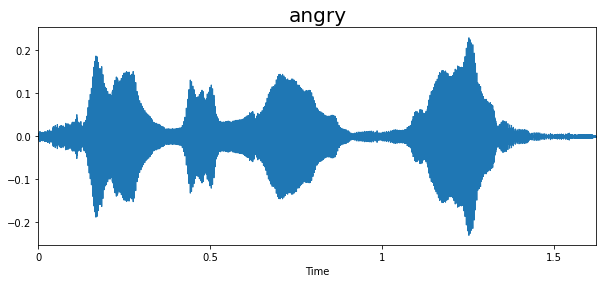

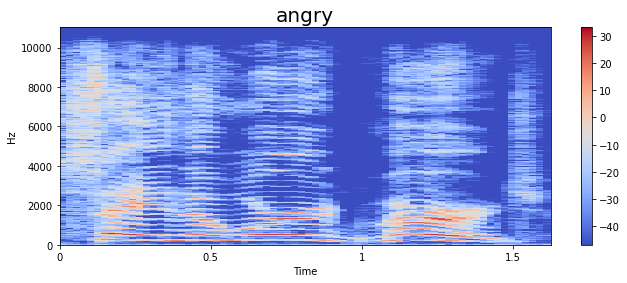

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

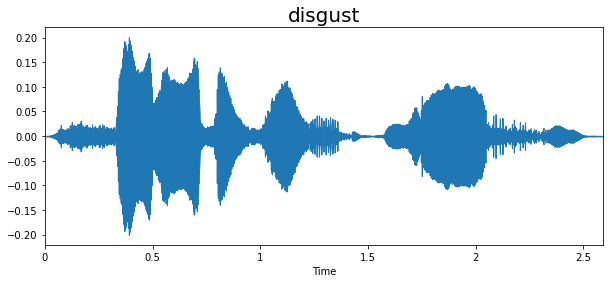

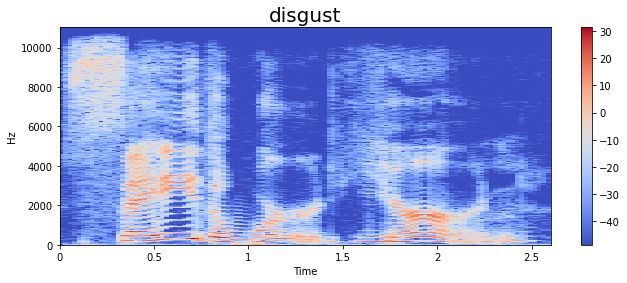

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

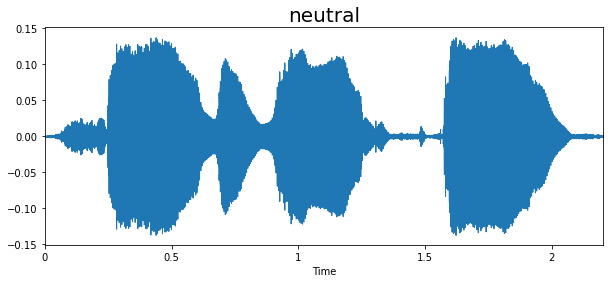

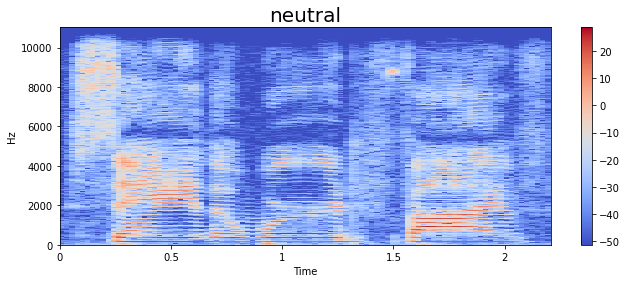

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

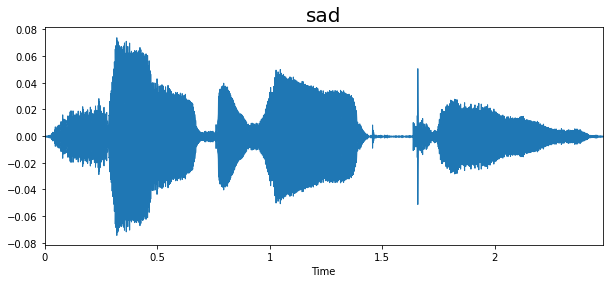

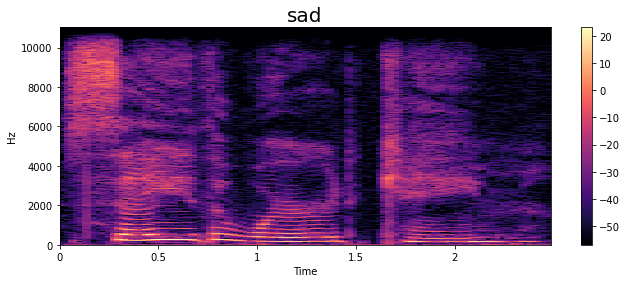

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

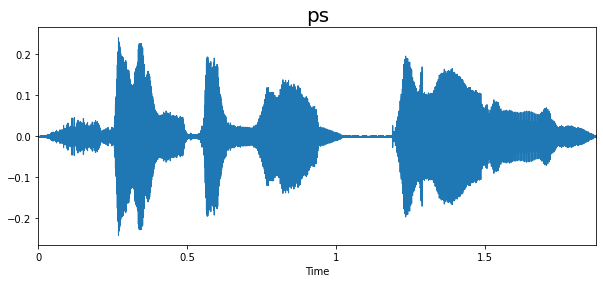

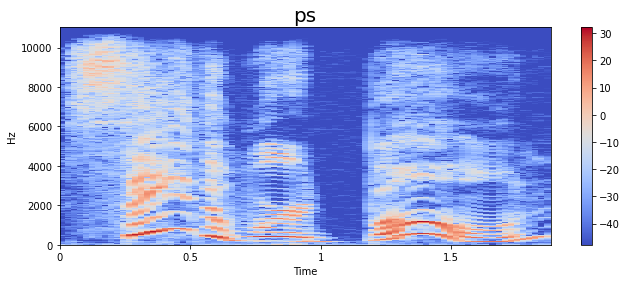

In [ ]:
emotion = 'ps'  #pleasent surprise :3
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

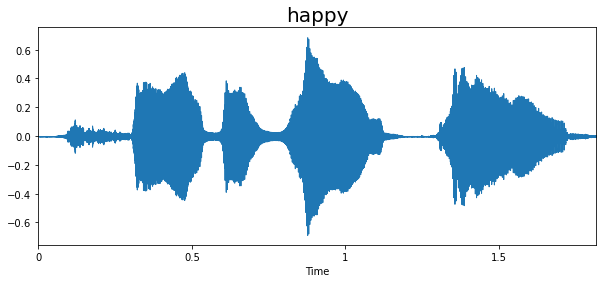

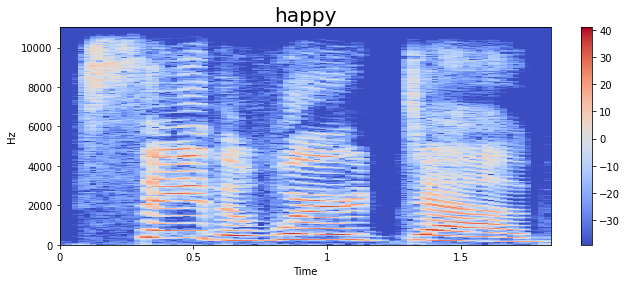

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

###Feature extraction


In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:

extract_mfcc(df['speech'][0])


array([-308.6167    ,   46.730453  ,  -28.313013  ,   13.5942    ,
         -1.93021   ,    7.5167723 ,    1.7069159 ,   -3.9386048 ,
          3.3554578 ,   12.961852  ,  -19.50465   ,    9.867044  ,
         -6.1076975 ,    2.622864  ,   -2.716001  ,   -4.974542  ,
         -5.7854557 ,   15.880578  ,   -2.8475966 ,   19.438099  ,
         12.375386  ,    9.608858  ,    3.4805107 ,    8.837482  ,
         -8.0608015 ,    8.032278  ,   -9.48719   ,   -0.5597826 ,
         -7.0384603 ,   -1.8063862 ,   -7.583833  ,    2.0662181 ,
         -7.8558564 ,    3.8261857 ,   -1.8243947 ,    2.6424856 ,
         -1.1009376 ,    4.5412307 ,    0.6562609 ,    0.80715257],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

0       [-308.6167, 46.730453, -28.313013, 13.5942, -1...
1       [-326.8029, 56.66853, -41.04171, 17.854784, -7...
2       [-314.33316, 44.64417, -28.355757, 8.200843, -...
3       [-265.4613, 62.387856, -17.287212, -1.2297745,...
4       [-301.42963, 23.261404, -10.773528, 16.420761,...
                              ...                        
2795    [-430.12775, 73.51896, -8.815644, -10.96209, -...
2796    [-433.08044, 67.6196, -2.7741835, -12.010009, ...
2797    [-409.0154, 107.16901, -5.925753, -32.632843, ...
2798    [-376.69388, 90.89355, -10.855276, -16.679157,...
2799    [-467.97388, 75.4238, -7.295418, -11.267856, 2...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

###Create the LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
5/5 [==============================] - 5s 424ms/step - loss: 1.8894 - accuracy: 0.2089 - val_loss: 1.9142 - val_accuracy: 0.0857
Epoch 2/100
5/5 [==============================] - 1s 272ms/step - loss: 1.7459 - accuracy: 0.3299 - val_loss: 1.8972 - val_accuracy: 0.0857
Epoch 3/100
5/5 [==============================] - 1s 269ms/step - loss: 1.5783 - accuracy: 0.4071 - val_loss: 1.9181 - val_accuracy: 0.0250
Epoch 4/100
5/5 [==============================] - 1s 281ms/step - loss: 1.3640 - accuracy: 0.5031 - val_loss: 1.8810 - val_accuracy: 0.0607
Epoch 5/100
5/5 [==============================] - 1s 276ms/step - loss: 1.1270 - accuracy: 0.5978 - val_loss: 1.7613 - val_accuracy: 0.0839
Epoch 6/100
5/5 [==============================] - 1s 266ms/step - loss: 0.9642 - accuracy: 0.6286 - val_loss: 1.6283 - val_accuracy: 0.3946
Epoch 7/100
5/5 [==============================] - 1s 271ms/step - loss: 0.7915 - accuracy: 0.6942 - val_loss: 1.4989 - val_accuracy: 0.4804
Epoch 8/100
5

###Show the results

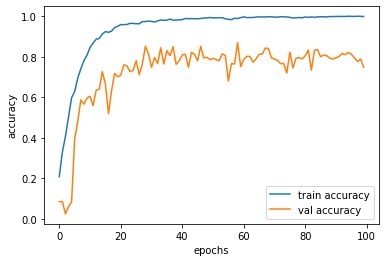

In [ ]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


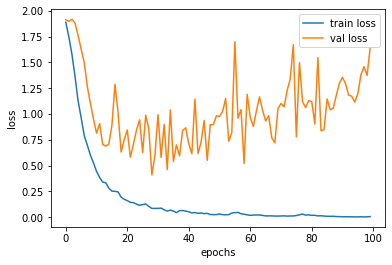

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()